In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg


In [ ]:
pip install librosa


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [1]:
from keras.models import load_model
model = load_model('../input/necessities/Emotion_Voice_Detection_Model.h5')

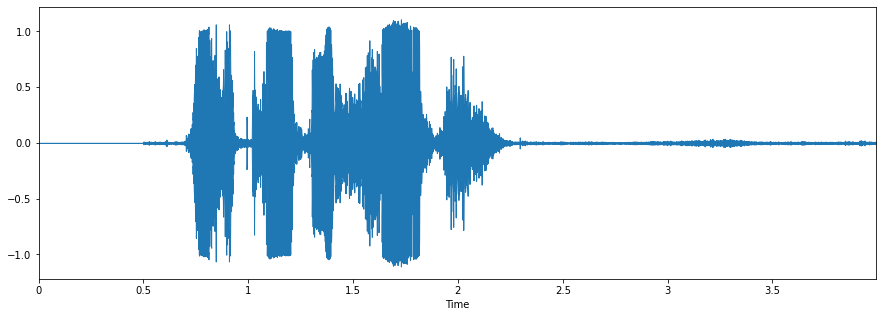

In [16]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#visualizing my angry audio recording

data, sampling_rate = librosa.load('../input/demovoice/Recording.wav')

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [23]:
angry_data,sample_rate = librosa.load('../input/sad-male/Recording (2).wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=angry_data, sr=sample_rate, n_mfcc=13),
                        axis=0)
angry_data_features = mfccs

In [26]:
model.summary()
#feeding our model prediction into the optimized CNN model
angry_data_features = np.atleast_2d(angry_data_features)
angry_data_features = np.expand_dims(angry_data_features,axis=2)
angry_predict = model.predict(angry_data_features)

print(np.argmax(angry_predict,axis=1))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 216, 128)          768       
_________________________________________________________________
activation_8 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 216, 128)          82048     
_________________________________________________________________
activation_9 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 27, 128)           8

In [25]:
import pandas as pd
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('../input/sad-male/Recording (2).wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [27]:
livedf2= pd.DataFrame(data=livedf2)

In [14]:

livedf2 = livedf2.stack().to_frame()
livedf2

,,0
0,0,-30.674604
1,0,-32.492943
2,0,-37.460373
3,0,-40.346638
4,0,-39.914951
...,...,...
195,0,-42.361843
196,0,-41.394367
197,0,-42.288620
198,0,-46.668377


NameError: name 'loaded_model' is not defined